# Nested sampling applied to the logistic model

This example demonstrates how to use ellipsoidal nested rejection sampling [1] to sample from the posterior distribution for a logistic model fitted to model-simulated data. For a tutorial on nested sampling, see: [INSERT LINK to NESTED SAMPLING TUTORIAL NOTEBOOK".

[1] "A nested sampling algorithm for cosmological model selection", Pia Mukherjee, David Parkinson and Andrew R. Liddle, arXiv:astro-ph/0508461v2.

First create fake data.

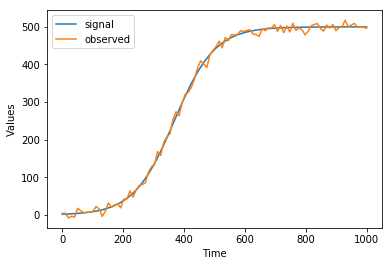

In [49]:
import pints
from __future__ import print_function
import pints
import pints.toy as toy
import numpy as np
import matplotlib.pyplot as plt
import pints._noiseAdders as noise

# Load a forward model
model = toy.LogisticModel()

# Create some toy data
r = 0.015
k = 500
real_parameters = [r, k]
times = np.linspace(0, 1000, 100)
signal_values = model.simulate(real_parameters, times)

# Add independent Gaussian noise
sigma = 10
observed_values = noise.addIndependentNoise(signal_values,sigma)

# Plot
plt.plot(times,signal_values,label = 'signal')
plt.plot(times,observed_values,label = 'observed')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.show()

Create the nested sampler that will be used to sample from the posterior.

Run the sampler!

In [11]:
samples = sampler.run()
print('Done!')

Running...
Running nested rejection sampling
Number of active points: 1000
Total number of iterations: 10000
Enlargement factor: 1.25
Total number of posterior samples: 1000
Starting rejection sampling...
Starting ellipsoidal sampling (finished rejection)...
200 ellipsoidal samples completed (updating ellipsoid)...
400 ellipsoidal samples completed (updating ellipsoid)...
600 ellipsoidal samples completed (updating ellipsoid)...
800 ellipsoidal samples completed (updating ellipsoid)...
1000 ellipsoidal samples completed (updating ellipsoid)...
1200 ellipsoidal samples completed (updating ellipsoid)...
1400 ellipsoidal samples completed (updating ellipsoid)...
1600 ellipsoidal samples completed (updating ellipsoid)...
1800 ellipsoidal samples completed (updating ellipsoid)...
2000 ellipsoidal samples completed (updating ellipsoid)...
2200 ellipsoidal samples completed (updating ellipsoid)...
2400 ellipsoidal samples completed (updating ellipsoid)...
2600 ellipsoidal samples completed (u

## Plot posterior samples versus true parameter values (dashed lines)

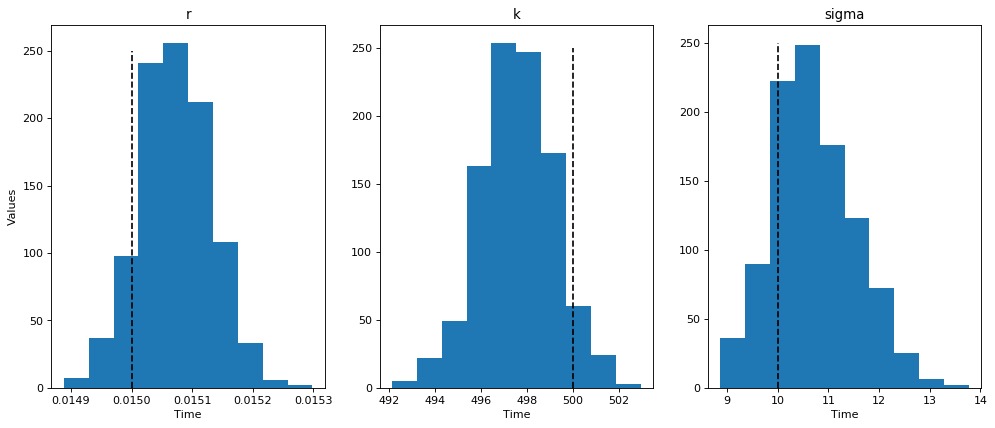

In [57]:
vTheta = samples[0]
plt.figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')

# r
ax1 = plt.subplot(131)
ax1.hist(vTheta[:,0])
ax1.set_xlabel('Time')
ax1.set_ylabel('Values')
ax1.set_title('r')
plt.plot((r, r), (0, 250), 'k--')

# k
ax2 = plt.subplot(132)
ax2.hist(vTheta[:,1])
ax2.set_xlabel('Time')
ax2.set_title('k')
plt.plot((k, k), (0, 250), 'k--')

# sigma
ax3 = plt.subplot(133)
ax3.hist(vTheta[:,2])
ax3.set_xlabel('Time')
ax3.set_title('sigma')
plt.plot((sigma, sigma), (0, 250), 'k--')
plt.show()

## Plot posterior predictive simulations versus the observed data

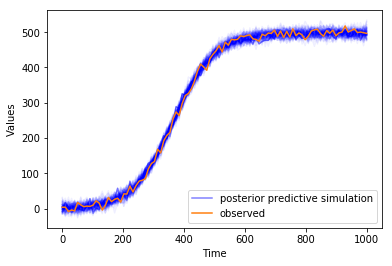

In [56]:
for i in range(0,100):
    r_est = vTheta[i,0]
    k_est = vTheta[i,1]
    sigma_est = vTheta[i,2]
    signal_values_est = model.simulate([r_est,k_est], times)
    observed_values_est = noise.addIndependentNoise(signal_values_est,sigma)
    plt.plot(times,observed_values_est,'b-',alpha = 0.03)
    if i == 0:
        plt.plot(times,observed_values_est,'b-',alpha = 0.5,label="posterior predictive simulation")
    else:
        plt.plot(times,observed_values_est,'b-',alpha = 0.03)
plt.plot(times,observed_values,'tab:orange',label="observed")
plt.legend()
plt.xlabel('Time')
plt.ylabel('Values')
plt.show()